# Actividad 2: Reconocimiento de imagenes más complejas utilizando redes neuronales convolucionales.

En esta actividad se llevará el reconocimiento de imagenes al siguiente nivel, reconociendo imágenes reales de Gatos y Perros para clasificar una imagen entrante como una u otra. En particular, algunos dataset como el reconocimiento de la escritura a mano agilizará el proceso al hacer que todas las imágenes tengan el mismo tamaño y forma, y todas fueran monocromo. Las imágenes del mundo real no son así... tienen diferentes formas, proporciones de aspecto, etc., ¡y normalmente son en color!

Así que, como parte de la tarea necesaria para el proceso de los datos... no es menos importante redimensionarlos para que tengan una forma uniforme.

Para completar esta actividad, se deben realizar los siguientes pasos:

1. Explorar los datos de ejemplo de gatos y perros
2. Preprocesar los datos
3. Construir y entrenar una red neuronal para reconocer la diferencia entre los dos
4. Evaluar la precisión del entrenamiento y la validación


# 1. Exploración de los datos

Comenzar descargando los datos de ejemplo, un .zip de 2.000 fotos JPG de gatos y perros, y extrayéndolo localmente en /tmp.

In [ ]:
import urllib.request
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
filename = '/tmp/cats_and_dogs_filtered.zip'
urllib.request.urlretrieve(url, filename)

('/tmp/cats_and_dogs_filtered.zip',
 <http.client.HTTPMessage at 0x7fbacddc4910>)

El siguiente código en Python utiliza la biblioteca del OS para usar las bibliotecas del sistema operativo, proporcionando acceso al sistema de archivos, y la biblioteca de archivos zip, que permite descomprimir los datos.

In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

A continuación se definen los directorios a utilizar para entrenar esta red neuronal

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directorio para la entrenamiento de las imagenes de gatos
train_cats_dir = os.path.join(train_dir, 'cats')

# Directorio para la validación de las imagenes de perros
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directorio para la validación de las imagenes de perros y gatos
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

Se observan los nombres de los archivos en los directorios de los entrenamientos de perros y gatos (las convenciones de nombres de archivos son las mismas en el directorio de validación):

In [ ]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.127.jpg', 'cat.126.jpg', 'cat.125.jpg', 'cat.124.jpg', 'cat.123.jpg', 'cat.122.jpg', 'cat.121.jpg', 'cat.120.jpg', 'cat.119.jpg', 'cat.118.jpg']
['dog.127.jpg', 'dog.126.jpg', 'dog.125.jpg', 'dog.124.jpg', 'dog.123.jpg', 'dog.122.jpg', 'dog.121.jpg', 'dog.120.jpg', 'dog.119.jpg', 'dog.118.jpg']


Se descubre el número total de imágenes de gatos y perros en los directorios de trenes y validación:

In [ ]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


Se diseñará ahora una CNN para la clasificación de un problema binario (perros y gatos):

**Ejercicio 1 ( 5 puntos)**: Diseñar una red neuronal convolucional para clasificar las imagenes de perros y gatos. Evaluar los requisitos de la red neuronal que se pide y construirla completando los parametros necesarios para que las capas de la red neuronal sean optimas para la tarea de clasificar los perros y gatos.


In [ ]:
import tensorflow as tf
# tu código para la red neuronal del ejercicio 1 aquí
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=[150,150,3]),
    tf.keras.layers.Conv2D(16,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=[150,150,3]),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu",input_shape=[150,150,3]),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

2022-08-13 01:03:57.595929: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-13 01:03:57.595978: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-08-13 01:04:07.380852: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-13 01:04:07.380915: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-13 01:04:07.380938: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-790a19ef-ef42-475f-a17c-6b9ee8d6e397): /proc/driver/nvidia/version does not exist
2022-08-13 01:04:07.381229: I tensorfl

Se comprueba el modelo:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 35, 35, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 33, 33, 64)        1

**Ejercicio 2 (1 punto)**: A continuación habrá que compilar el modelo, para ello usar el optimizador RMSprop, para el loss. Se debe tener en cuenta los elementos a  clasificar, en este caso perros y gatos (un clasificador binario). Como métrica mostrar la precisión.

In [ ]:
# tu código para la compilación del ejercicio 2 aquí
model.compile(loss='binary_crossentropy',
            optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
            metrics=['accuracy'])

# 2. Preprocesamiento de los datos

Una buena practica cuando se trate de clasificar imagenes, es pretratar los datos (imagenes) para mejorar la precisión de la CNN

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Todas las imagenes tienen que ser reescaldas a 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flujo de imagenes de entrenamiento en batches de 20 usando el "train_datagen generator"
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flujo de imagenes de entrenamiento en batches de 20 usando el "test_datagen generator"
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# 3. Construcción del modelo, entreno y validación.

**Ejercicio 3 (1 puntos)**: Para concluir la creación de la CNN para la clasificación de perros y gatos, falta entrenar la red neuronal. Para ello escribir, crear la variable "history" y guardar en esa variable el modelo entrenado de la CNN. Para el entrenamiento, se deberán definir los "step_per_epoch", el número de "epochs", el número de "validation_steps" y usar "verbose=2".

In [ ]:
# tu código para la variable history que guarda el entrenamiento de la CNN del ejercicio 3 aquí
history = model.fit(
    train_generator,
    epochs=40,
    steps_per_epoch=100,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2
)

Epoch 1/40
100/100 - 184s - loss: 0.7125 - accuracy: 0.5225 - val_loss: 0.6592 - val_accuracy: 0.5920 - 184s/epoch - 2s/step
Epoch 2/40
100/100 - 178s - loss: 0.6699 - accuracy: 0.5950 - val_loss: 0.6507 - val_accuracy: 0.6170 - 178s/epoch - 2s/step
Epoch 3/40
100/100 - 181s - loss: 0.6032 - accuracy: 0.6755 - val_loss: 0.5492 - val_accuracy: 0.7150 - 181s/epoch - 2s/step
Epoch 4/40
100/100 - 185s - loss: 0.5349 - accuracy: 0.7360 - val_loss: 0.5402 - val_accuracy: 0.7340 - 185s/epoch - 2s/step
Epoch 5/40
100/100 - 181s - loss: 0.4701 - accuracy: 0.7715 - val_loss: 0.5841 - val_accuracy: 0.6950 - 181s/epoch - 2s/step
Epoch 6/40
100/100 - 180s - loss: 0.4093 - accuracy: 0.8215 - val_loss: 0.5332 - val_accuracy: 0.7350 - 180s/epoch - 2s/step
Epoch 7/40
100/100 - 187s - loss: 0.3246 - accuracy: 0.8575 - val_loss: 0.5434 - val_accuracy: 0.7440 - 187s/epoch - 2s/step
Epoch 8/40
100/100 - 188s - loss: 0.2834 - accuracy: 0.8780 - val_loss: 0.6187 - val_accuracy: 0.7470 - 188s/epoch - 2s/step


# 4. Evaluando la precisión y la perdida del modelo


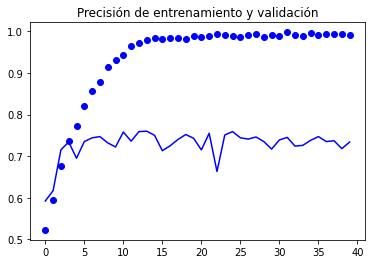

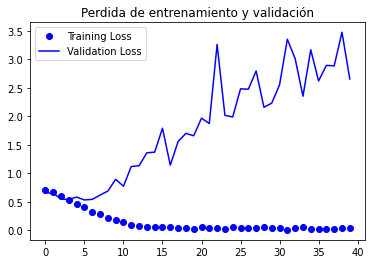

In [ ]:
#-----------------------------------------------------------
# Recuperar una lista de resultados de la lista de datos de los conjuntos de entrenamiento y pruebas para cada epoch de entrenamiento
#-----------------------------------------------------------
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#------------------------------------------------
# Imprimir la precisión del entrenamiento y validación por epoch
#------------------------------------------------
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Precisión de entrenamiento y validación')

plt.figure()

#------------------------------------------------
# Imprimir la perdida de entrenamiento y validación por epoch
#------------------------------------------------
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Perdida de entrenamiento y validación')
plt.legend()

plt.show()

Como se puede observar, este es un claro ejemplo de overfitting, algo que naturalmente se quiere evitar para que las redes neuronales sean lo más precisas posibles.

**Ejercicio 4 (3 puntos)**: Para soluciónar este problema, se debe rehacer algunas partes del código anterior utilizando las técnicas de regularización aprendidas en clase, como el data augmentation.

*Consejo*: Volver a escribir otra vez todas las secciones y cambiar el código necesario aplicando las técnicas de regularización elegidas. Se debe recordar que este tipo de técnicas se suele usar en el preprocesamiento de los datos.

*Aclaración*: Se espera que al menos se use una de las técnicas de regularización aprendidas en clase. Se valorará positivamente razonar el motivo del uso de la técnica escogida (o escogidas en el caso de ser varias) y no las otras.

A modo orientativo, se espera obtener un resultado gráfico similar a este:

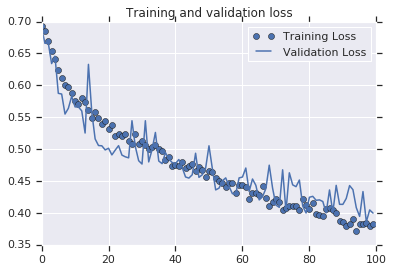
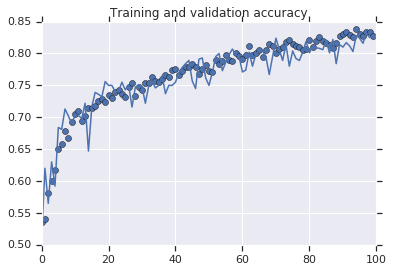

# 5. Corrección

Primero se mejora el generador de imágenes. Este generador es muy popular, es usado incluso en el material de clase del curso. Permite tener diversas variantes de la misma imagen.

In [ ]:
### Tu código aquí para la reducción del overfitting del ejercicio 4 aquí ###

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Todas las imagenes tienen que ser reescaldas a 1./255.
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=[0.2,1.5],
    shear_range=15,
    height_shift_range=0.2,
    width_shift_range=0.2,
    rotation_range=30,
    fill_mode="nearest"
    )
test_datagen  = ImageDataGenerator( rescale = 1.0/255.)

# --------------------
# Flujo de imagenes de entrenamiento en batches de 20 usando el "train_datagen generator"
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    shuffle=True,
                                                    target_size=(150, 150))     
# --------------------
# Flujo de imagenes de entrenamiento en batches de 20 usando el "test_datagen generator"
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=100,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Modelo 0

In [ ]:
# import tensorflow as tf
model0 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=[150,150,3]),
    tf.keras.layers.Conv2D(16,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=[150,150,3]),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu",input_shape=[150,150,3]),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model0.summary()
model0.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 conv2d_5 (Conv2D)           (None, 146, 146, 16)      2320      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 73, 73, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 71, 71, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 35, 35, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 33, 33, 64)       

In [ ]:
history0 = model.fit(
    train_generator,
    epochs=100,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    verbose=2
)
# Guardar el Modelo
model0.save('out/model0.h5')

# Recrea exactamente el mismo modelo solo desde el archivo
# model = keras.models.load_model('out/model0.h5')

Epoch 1/100
20/20 - 191s - loss: 0.9464 - accuracy: 0.5730 - val_loss: 0.6074 - val_accuracy: 0.6500 - 191s/epoch - 10s/step
Epoch 2/100
20/20 - 192s - loss: 0.6776 - accuracy: 0.5855 - val_loss: 0.5971 - val_accuracy: 0.6720 - 192s/epoch - 10s/step
Epoch 3/100
20/20 - 178s - loss: 0.6446 - accuracy: 0.6265 - val_loss: 0.6864 - val_accuracy: 0.5800 - 178s/epoch - 9s/step
Epoch 4/100
20/20 - 172s - loss: 0.6615 - accuracy: 0.6075 - val_loss: 0.5840 - val_accuracy: 0.6830 - 172s/epoch - 9s/step
Epoch 5/100
20/20 - 193s - loss: 0.6350 - accuracy: 0.6245 - val_loss: 0.5852 - val_accuracy: 0.6970 - 193s/epoch - 10s/step
Epoch 6/100
20/20 - 259s - loss: 0.6422 - accuracy: 0.6150 - val_loss: 0.6394 - val_accuracy: 0.6510 - 259s/epoch - 13s/step
Epoch 7/100
20/20 - 269s - loss: 0.6415 - accuracy: 0.6300 - val_loss: 0.5975 - val_accuracy: 0.6570 - 269s/epoch - 13s/step
Epoch 8/100
20/20 - 222s - loss: 0.6353 - accuracy: 0.6425 - val_loss: 0.6568 - val_accuracy: 0.5870 - 222s/epoch - 11s/step
Ep

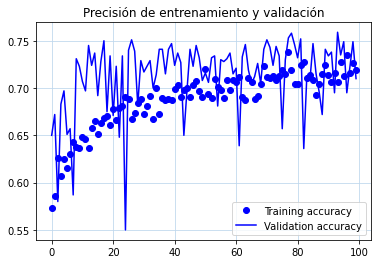

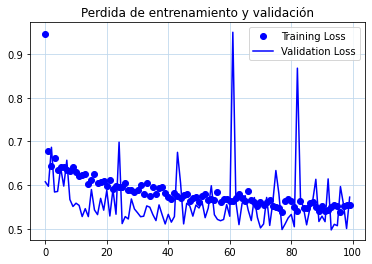

In [ ]:
#-----------------------------------------------------------
# Recuperar una lista de resultados de la lista de datos de los conjuntos de entrenamiento y pruebas para cada epoch de entrenamiento
#-----------------------------------------------------------
import matplotlib.pyplot as plt

acc = history0.history['accuracy']
val_acc = history0.history['val_accuracy']
loss = history0.history['loss']
val_loss = history0.history['val_loss']

epochs = range(len(acc))

#------------------------------------------------
# Imprimir la precisión del entrenamiento y validación por epoch
#------------------------------------------------
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Precisión de entrenamiento y validación')
plt.legend(loc="lower right")
plt.grid(color='#BFD7ED')

plt.figure()

#------------------------------------------------
# Imprimir la perdida de entrenamiento y validación por epoch
#------------------------------------------------
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Perdida de entrenamiento y validación')
plt.legend(loc="upper right")
plt.grid(color='#BFD7ED')

plt.show()

## Modelo 1

In [ ]:
# import tensorflow as tf
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])
model1.summary()
model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer="adam",
              metrics=["accuracy"])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
history1 = model.fit(
    train_generator,
    epochs=100,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    verbose=2
)
# Guardar el Modelo
model1.save('out/model1.h5')

# Recrea exactamente el mismo modelo solo desde el archivo
# model = keras.models.load_model('out/model1.h5')

Epoch 1/100
20/20 - 186s - loss: 0.5691 - accuracy: 0.6980 - val_loss: 0.5218 - val_accuracy: 0.7360 - 186s/epoch - 9s/step
Epoch 2/100
20/20 - 177s - loss: 0.5503 - accuracy: 0.7230 - val_loss: 0.6038 - val_accuracy: 0.6720 - 177s/epoch - 9s/step
Epoch 3/100
20/20 - 178s - loss: 0.5491 - accuracy: 0.7180 - val_loss: 0.5309 - val_accuracy: 0.7300 - 178s/epoch - 9s/step
Epoch 4/100
20/20 - 175s - loss: 0.5531 - accuracy: 0.7080 - val_loss: 0.5825 - val_accuracy: 0.7210 - 175s/epoch - 9s/step
Epoch 5/100
20/20 - 182s - loss: 0.5436 - accuracy: 0.7150 - val_loss: 0.5299 - val_accuracy: 0.7360 - 182s/epoch - 9s/step
Epoch 6/100
20/20 - 183s - loss: 0.5450 - accuracy: 0.7240 - val_loss: 0.5150 - val_accuracy: 0.7510 - 183s/epoch - 9s/step
Epoch 7/100
20/20 - 179s - loss: 0.5544 - accuracy: 0.7130 - val_loss: 0.5317 - val_accuracy: 0.7370 - 179s/epoch - 9s/step
Epoch 8/100
20/20 - 183s - loss: 0.5364 - accuracy: 0.7240 - val_loss: 0.5314 - val_accuracy: 0.7300 - 183s/epoch - 9s/step
Epoch 9/

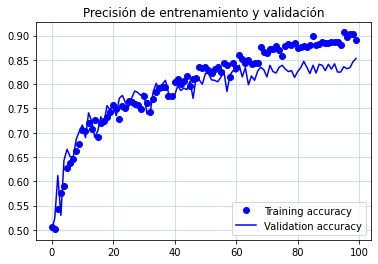

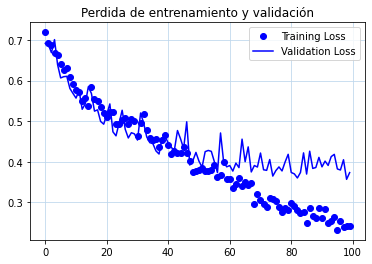

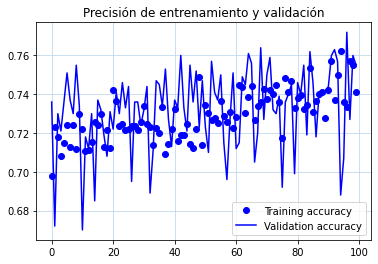

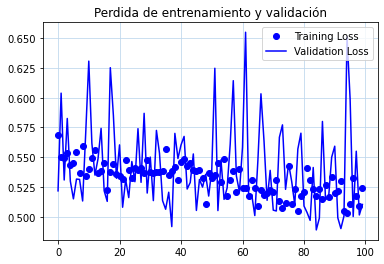

In [ ]:
#-----------------------------------------------------------
# Recuperar una lista de resultados de la lista de datos de los conjuntos de entrenamiento y pruebas para cada epoch de entrenamiento
#-----------------------------------------------------------
import matplotlib.pyplot as plt

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

#------------------------------------------------
# Imprimir la precisión del entrenamiento y validación por epoch
#------------------------------------------------
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Precisión de entrenamiento y validación')
plt.legend(loc="lower right")
plt.grid(color='#BFD7ED')

plt.figure()

#------------------------------------------------
# Imprimir la perdida de entrenamiento y validación por epoch
#------------------------------------------------
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Perdida de entrenamiento y validación')
plt.legend(loc="upper right")
plt.grid(color='#BFD7ED')

plt.show()

## Modelo 2

In [ ]:
# import tensorflow as tf
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=[150,150,3]),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(256,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model2.summary()
model2.compile(loss='binary_crossentropy',
            optimizer='RMSprop',
            metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
history2 = model.fit(
    train_generator,
    epochs=100,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    verbose=2
)
# Guardar el Modelo
model2.save('out/model2.h5')

# Recrea exactamente el mismo modelo solo desde el archivo
# model = keras.models.load_model('out/model2.h5')

Epoch 1/100
20/20 - 148s - loss: 1.2640 - accuracy: 0.4870 - val_loss: 0.6916 - val_accuracy: 0.5000 - 148s/epoch - 7s/step
Epoch 2/100
20/20 - 138s - loss: 0.6957 - accuracy: 0.5050 - val_loss: 0.6908 - val_accuracy: 0.5010 - 138s/epoch - 7s/step
Epoch 3/100
20/20 - 136s - loss: 0.6928 - accuracy: 0.5090 - val_loss: 0.6801 - val_accuracy: 0.6120 - 136s/epoch - 7s/step
Epoch 4/100
20/20 - 136s - loss: 0.6986 - accuracy: 0.5705 - val_loss: 0.6486 - val_accuracy: 0.6380 - 136s/epoch - 7s/step
Epoch 5/100
20/20 - 150s - loss: 0.7012 - accuracy: 0.5845 - val_loss: 0.6523 - val_accuracy: 0.6230 - 150s/epoch - 7s/step
Epoch 6/100
20/20 - 134s - loss: 0.6796 - accuracy: 0.6050 - val_loss: 0.6928 - val_accuracy: 0.5070 - 134s/epoch - 7s/step
Epoch 7/100
20/20 - 137s - loss: 0.6596 - accuracy: 0.6025 - val_loss: 0.6885 - val_accuracy: 0.5570 - 137s/epoch - 7s/step
Epoch 8/100
20/20 - 134s - loss: 0.6470 - accuracy: 0.6195 - val_loss: 0.5960 - val_accuracy: 0.6770 - 134s/epoch - 7s/step
Epoch 9/

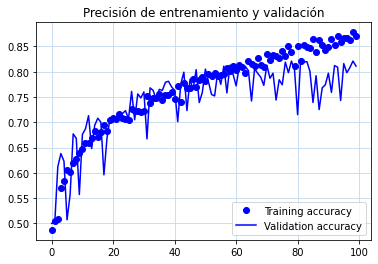

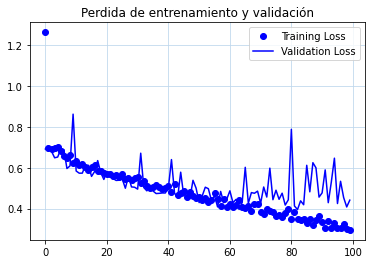

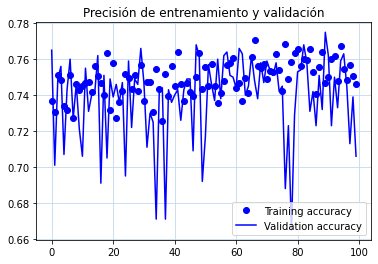

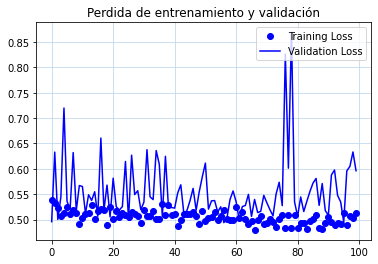

In [ ]:
#-----------------------------------------------------------
# Recuperar una lista de resultados de la lista de datos de los conjuntos de entrenamiento y pruebas para cada epoch de entrenamiento
#-----------------------------------------------------------
import matplotlib.pyplot as plt

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

#------------------------------------------------
# Imprimir la precisión del entrenamiento y validación por epoch
#------------------------------------------------
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Precisión de entrenamiento y validación')
plt.legend(loc="lower right")
plt.grid(color='#BFD7ED')

plt.figure()

#------------------------------------------------
# Imprimir la perdida de entrenamiento y validación por epoch
#------------------------------------------------
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Perdida de entrenamiento y validación')
plt.legend(loc="upper right")
plt.grid(color='#BFD7ED')

plt.show()

## Modelo 3

Este modelo 3, usa capas de normalización luego de cada convolución. Aunque la perdida comienza a ser inestable luego de las 60 épocas, la realidad es que el modelo es viable hasta las 90 épocas con un `accuracy` superior al 0.80.

In [ ]:
#import tensorflow as tf
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=[150,150,3]),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Conv2D(256,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model3.summary()
model3.compile(loss='binary_crossentropy',
            optimizer='RMSprop',
            metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 normalization (Normalizatio  (None, 74, 74, 32)       65        
 n)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                        

In [ ]:
history3 = model.fit(
    train_generator,
    epochs=100,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    verbose=2
)
# Guardar el Modelo
model3.save('out/model3.h5')

# Recrea exactamente el mismo modelo solo desde el archivo
# model = keras.models.load_model('out/model3.h5')

Epoch 1/100
2022-08-10 17:05:49.420154: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 280371200 exceeds 10% of free system memory.
2022-08-10 17:05:54.116017: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 280371200 exceeds 10% of free system memory.
2022-08-10 17:05:55.646902: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 280371200 exceeds 10% of free system memory.
2022-08-10 17:06:00.203556: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 280371200 exceeds 10% of free system memory.
2022-08-10 17:06:01.711650: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 280371200 exceeds 10% of free system memory.


KeyboardInterrupt: 

Epoch 1/100
20/20 - 115s - loss: 0.5102 - accuracy: 0.7525 - val_loss: 0.6867 - val_accuracy: 0.6870 - 115s/epoch - 6s/step
Epoch 2/100
20/20 - 116s - loss: 0.5152 - accuracy: 0.7400 - val_loss: 0.5630 - val_accuracy: 0.7560 - 116s/epoch - 6s/step
Epoch 3/100
20/20 - 102s - loss: 0.4781 - accuracy: 0.7645 - val_loss: 0.7920 - val_accuracy: 0.6670 - 102s/epoch - 5s/step
Epoch 4/100
20/20 - 103s - loss: 0.4941 - accuracy: 0.7550 - val_loss: 0.6508 - val_accuracy: 0.7290 - 103s/epoch - 5s/step
Epoch 5/100
20/20 - 103s - loss: 0.4937 - accuracy: 0.7490 - val_loss: 0.5396 - val_accuracy: 0.7410 - 103s/epoch - 5s/step
Epoch 6/100
20/20 - 102s - loss: 0.5001 - accuracy: 0.7575 - val_loss: 0.5537 - val_accuracy: 0.7390 - 102s/epoch - 5s/step
Epoch 7/100
20/20 - 105s - loss: 0.5008 - accuracy: 0.7495 - val_loss: 0.4927 - val_accuracy: 0.7660 - 105s/epoch - 5s/step
Epoch 8/100
20/20 - 102s - loss: 0.4824 - accuracy: 0.7600 - val_loss: 0.5297 - val_accuracy: 0.7720 - 102s/epoch - 5s/step
Epoch 9/

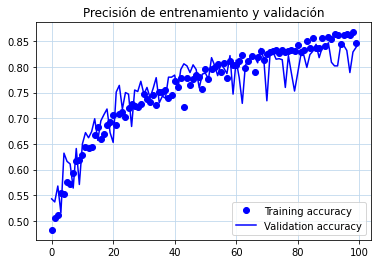

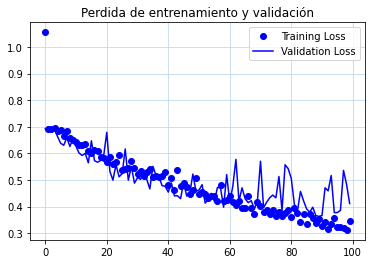

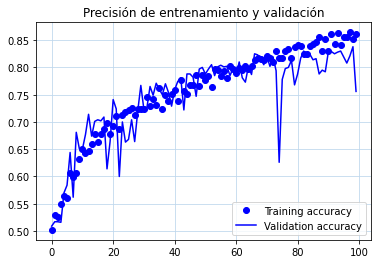

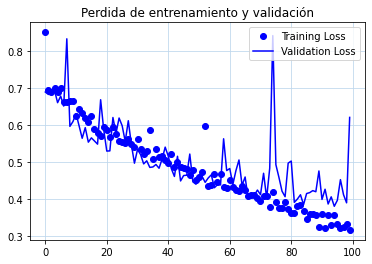

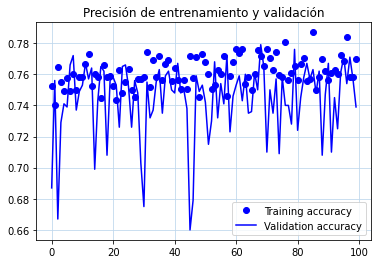

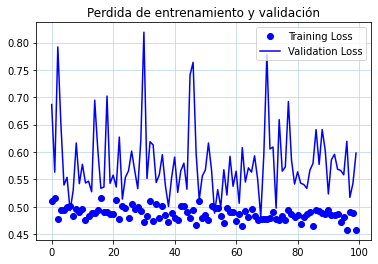

In [ ]:
#-----------------------------------------------------------
# Recuperar una lista de resultados de la lista de datos de los conjuntos de entrenamiento y pruebas para cada epoch de entrenamiento
#-----------------------------------------------------------
import matplotlib.pyplot as plt

acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

#------------------------------------------------
# Imprimir la precisión del entrenamiento y validación por epoch
#------------------------------------------------
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Precisión de entrenamiento y validación')
plt.legend(loc="lower right")
plt.grid(color='#BFD7ED')

plt.figure()

#------------------------------------------------
# Imprimir la perdida de entrenamiento y validación por epoch
#------------------------------------------------
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Perdida de entrenamiento y validación')
plt.legend(loc="upper right")
plt.grid(color='#BFD7ED')

plt.show()

In [ ]:
# 6. Gráfica comparativa

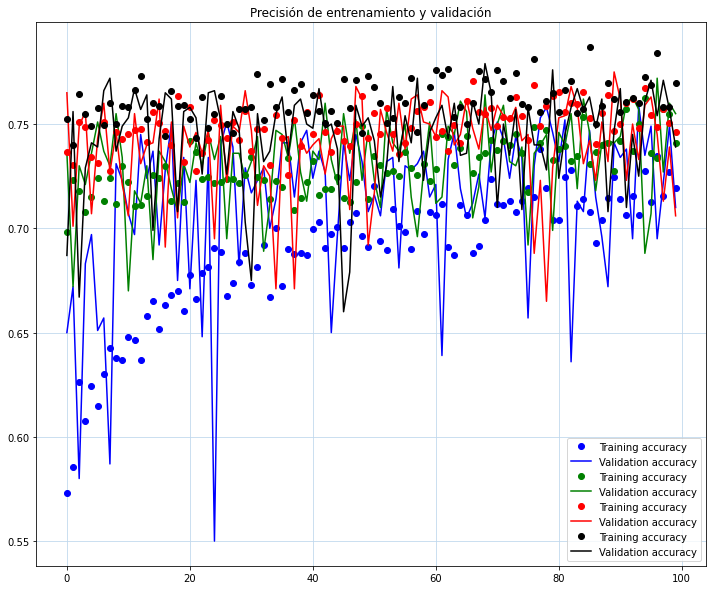

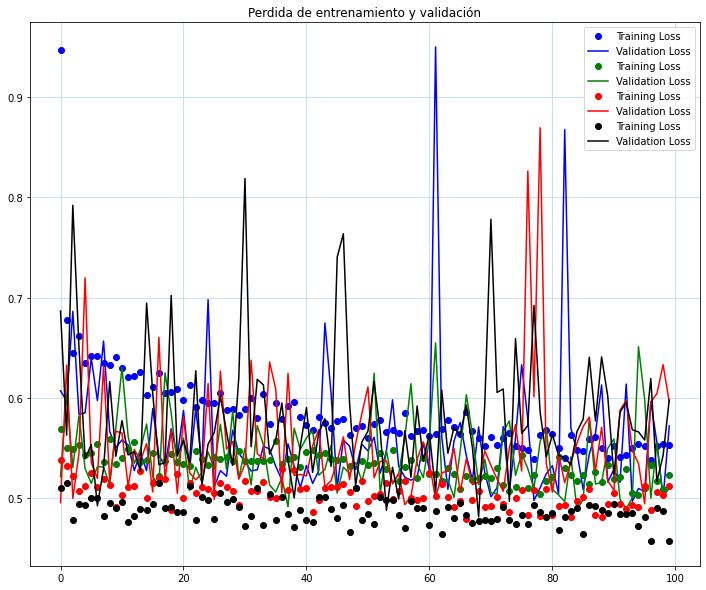

In [ ]:
#-----------------------------------------------------------
# Recuperar una lista de resultados de la lista de datos de los conjuntos de entrenamiento y pruebas para cada epoch de entrenamiento
#-----------------------------------------------------------
acc0 = history0.history['accuracy']
val_acc0 = history0.history['val_accuracy']
loss0 = history0.history['loss']
val_loss0 = history0.history['val_loss']

acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

epochs = range(len(acc0))

#------------------------------------------------
# Imprimir la precisión del entrenamiento y validación por epoch
#------------------------------------------------
plt.figure(figsize=(12,10))
plt.plot(epochs, acc0, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc0, 'b', label='Validation accuracy')

plt.plot(epochs, acc1, 'go', label='Training accuracy')
plt.plot(epochs, val_acc1, 'g', label='Validation accuracy')

plt.plot(epochs, acc2, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc2, 'r', label='Validation accuracy')

plt.plot(epochs, acc3, 'ko', label='Training accuracy')
plt.plot(epochs, val_acc3, 'k', label='Validation accuracy')

plt.title('Precisión de entrenamiento y validación')
plt.legend(loc="lower right")
plt.grid(color='#BFD7ED')

#------------------------------------------------
# Imprimir la perdida de entrenamiento y validación por epoch
#------------------------------------------------
plt.figure(figsize=(12,10))
plt.plot(epochs, loss0, 'bo', label='Training Loss')
plt.plot(epochs, val_loss0, 'b', label='Validation Loss')

plt.plot(epochs, loss1, 'go', label='Training Loss')
plt.plot(epochs, val_loss1, 'g', label='Validation Loss')

plt.plot(epochs, loss2, 'ro', label='Training Loss')
plt.plot(epochs, val_loss2, 'r', label='Validation Loss')

plt.plot(epochs, loss3, 'ko', label='Training Loss')
plt.plot(epochs, val_loss3, 'k', label='Validation Loss')

plt.title('Perdida de entrenamiento y validación')
plt.legend(loc="upper right")
plt.grid(color='#BFD7ED')

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=790a19ef-ef42-475f-a17c-6b9ee8d6e397' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>